<a href="https://colab.research.google.com/github/marutipai7/poultry-litter-raking/blob/main/poultry_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir '/content/drive/My Drive/yolov8'

In [4]:
from roboflow import Roboflow

In [5]:
rf = Roboflow(api_key="LTpT6Qjy7cU4K0MGGjVk")
project = rf.workspace("litter-raking-project").project("smart-poultry-farm-litter-raking")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to smart-poultry-farm-litter-raking-3 in yolov8:: 100%|██████████| 31948/31948 [00:09<00:00, 3200.04it/s]


In [6]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.1/749.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [7]:
from ultralytics import YOLO

In [8]:
model =YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 116MB/s]


In [10]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/smart-poultry-farm-litter-raking-3/data.yaml epochs=5 batch=8 plots=True

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/smart-poultry-farm-litter-raking-3/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

In [11]:
!ls /content/runs/detect/train2

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1712149254.40570d93690d.5630.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


In [12]:
from IPython.display import Image

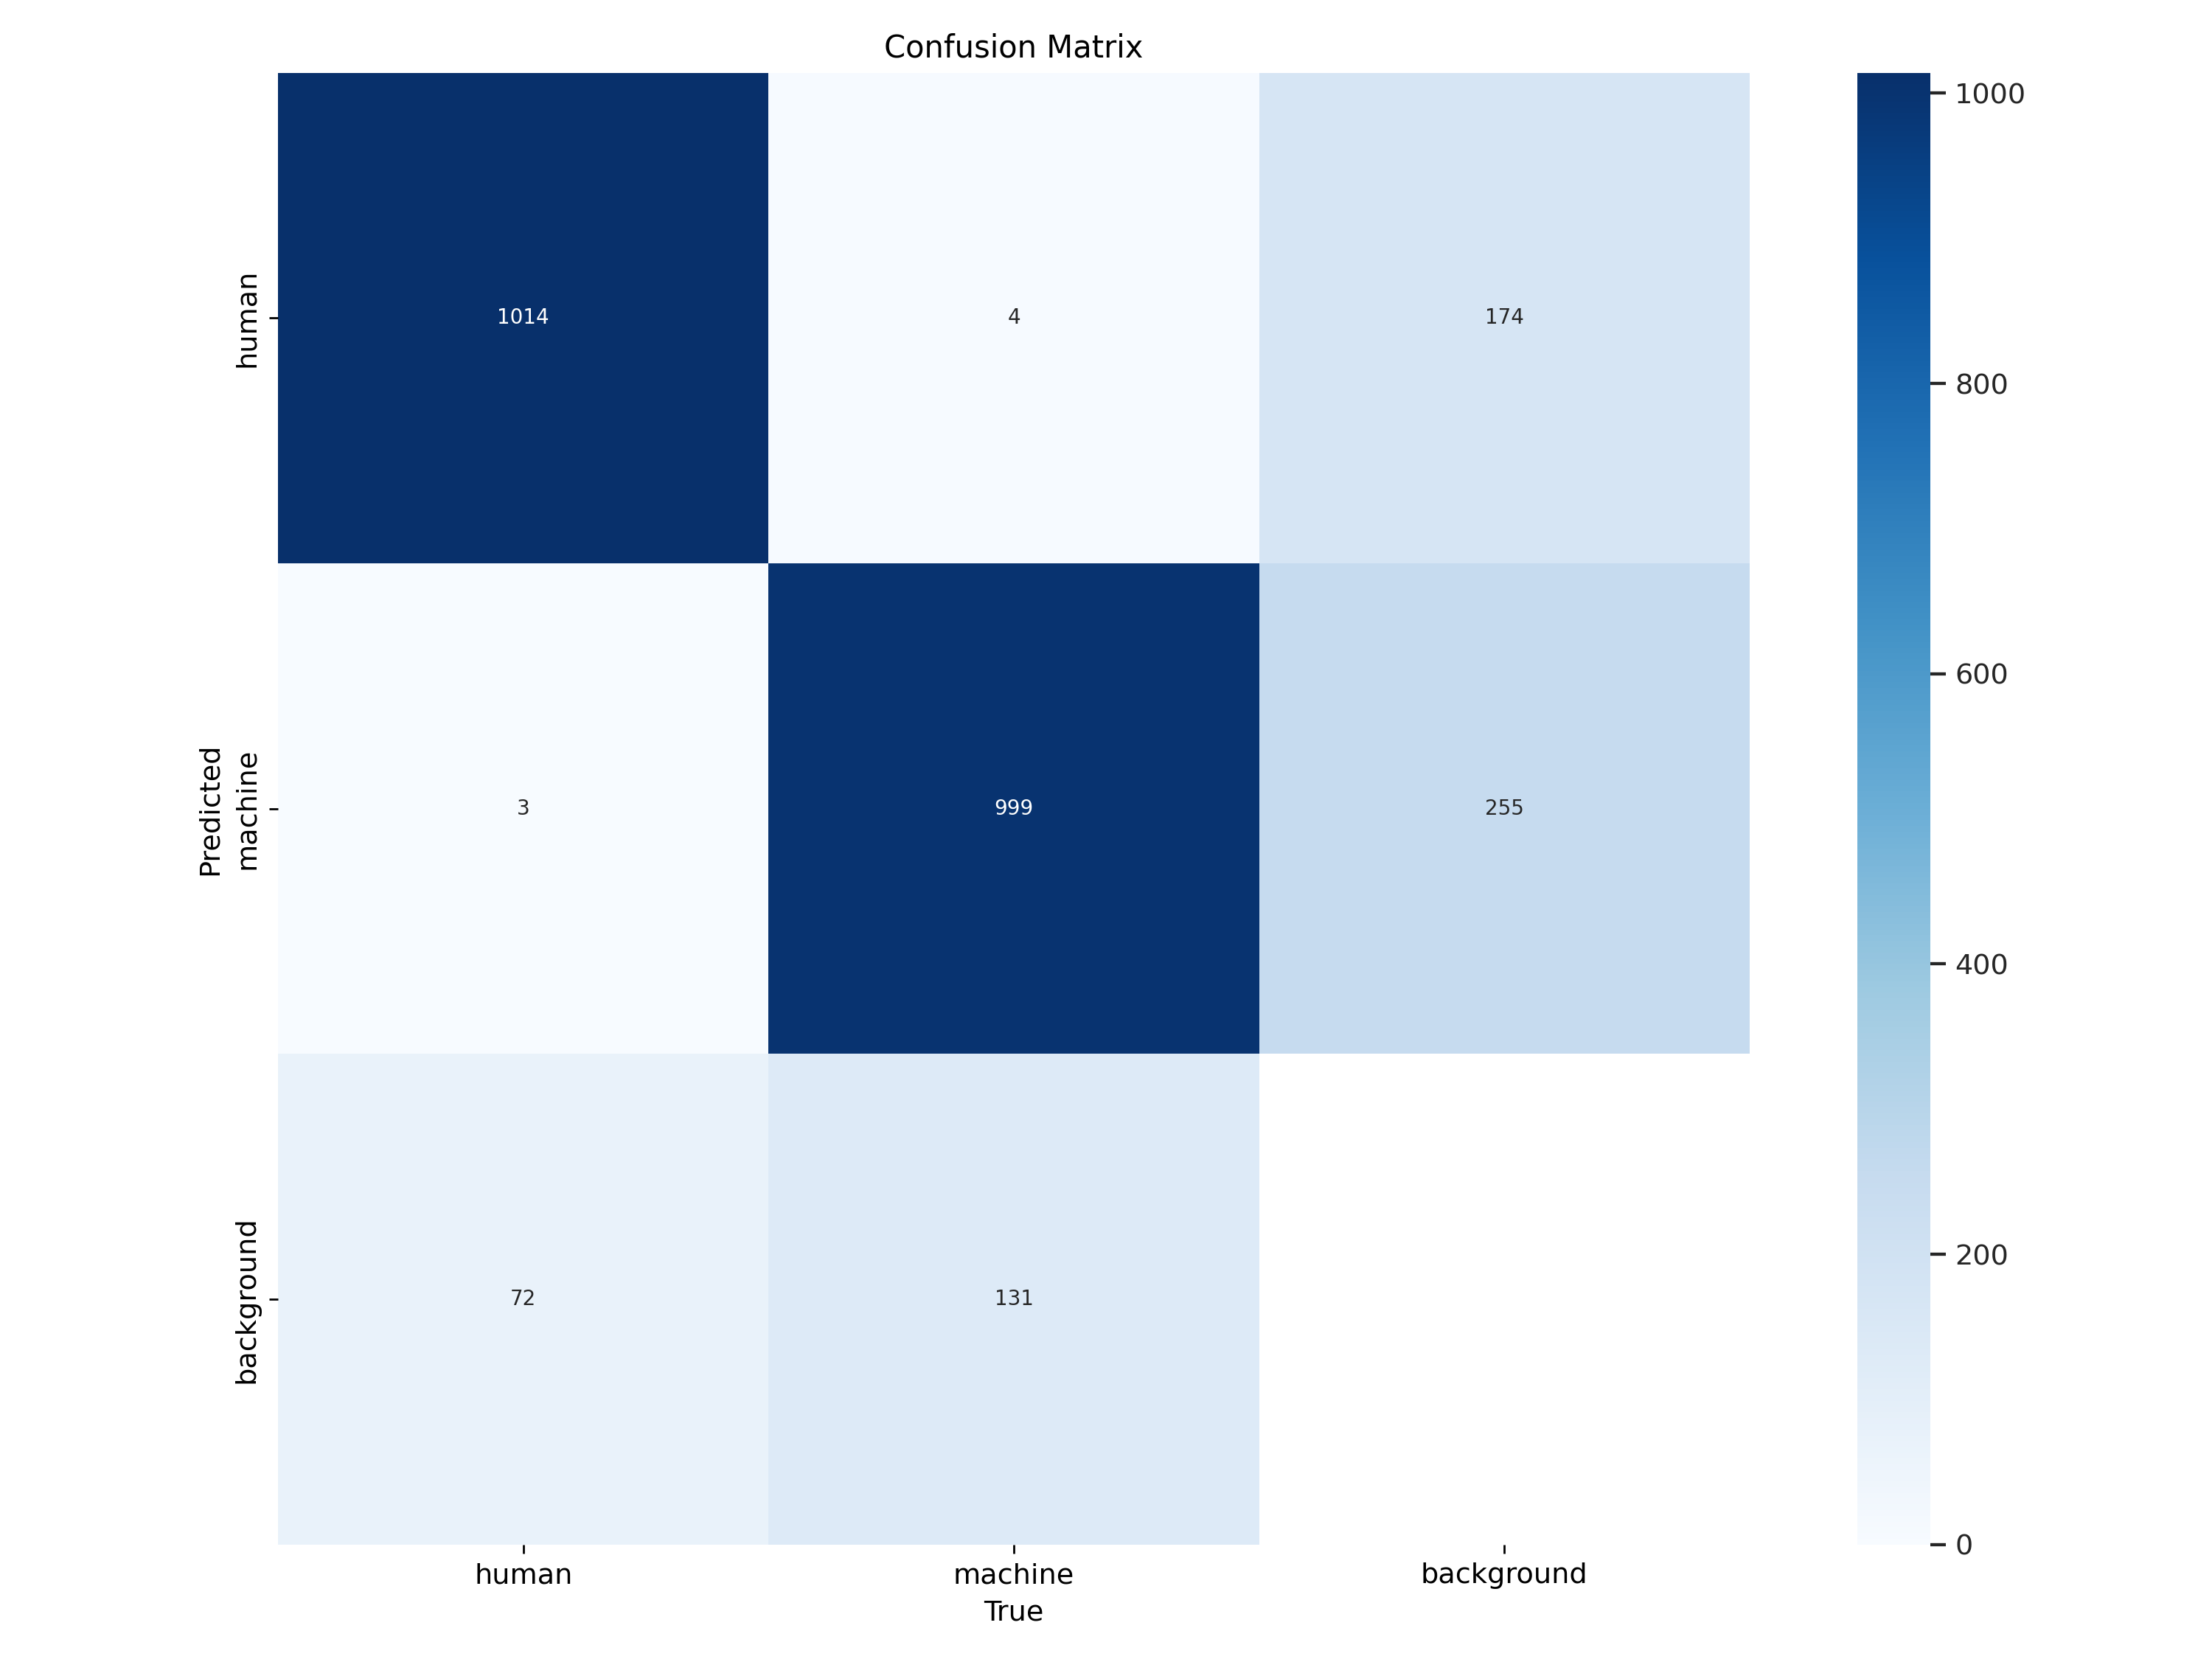

In [13]:
Image(filename="/content/runs/detect/train2/confusion_matrix.png",width=600)

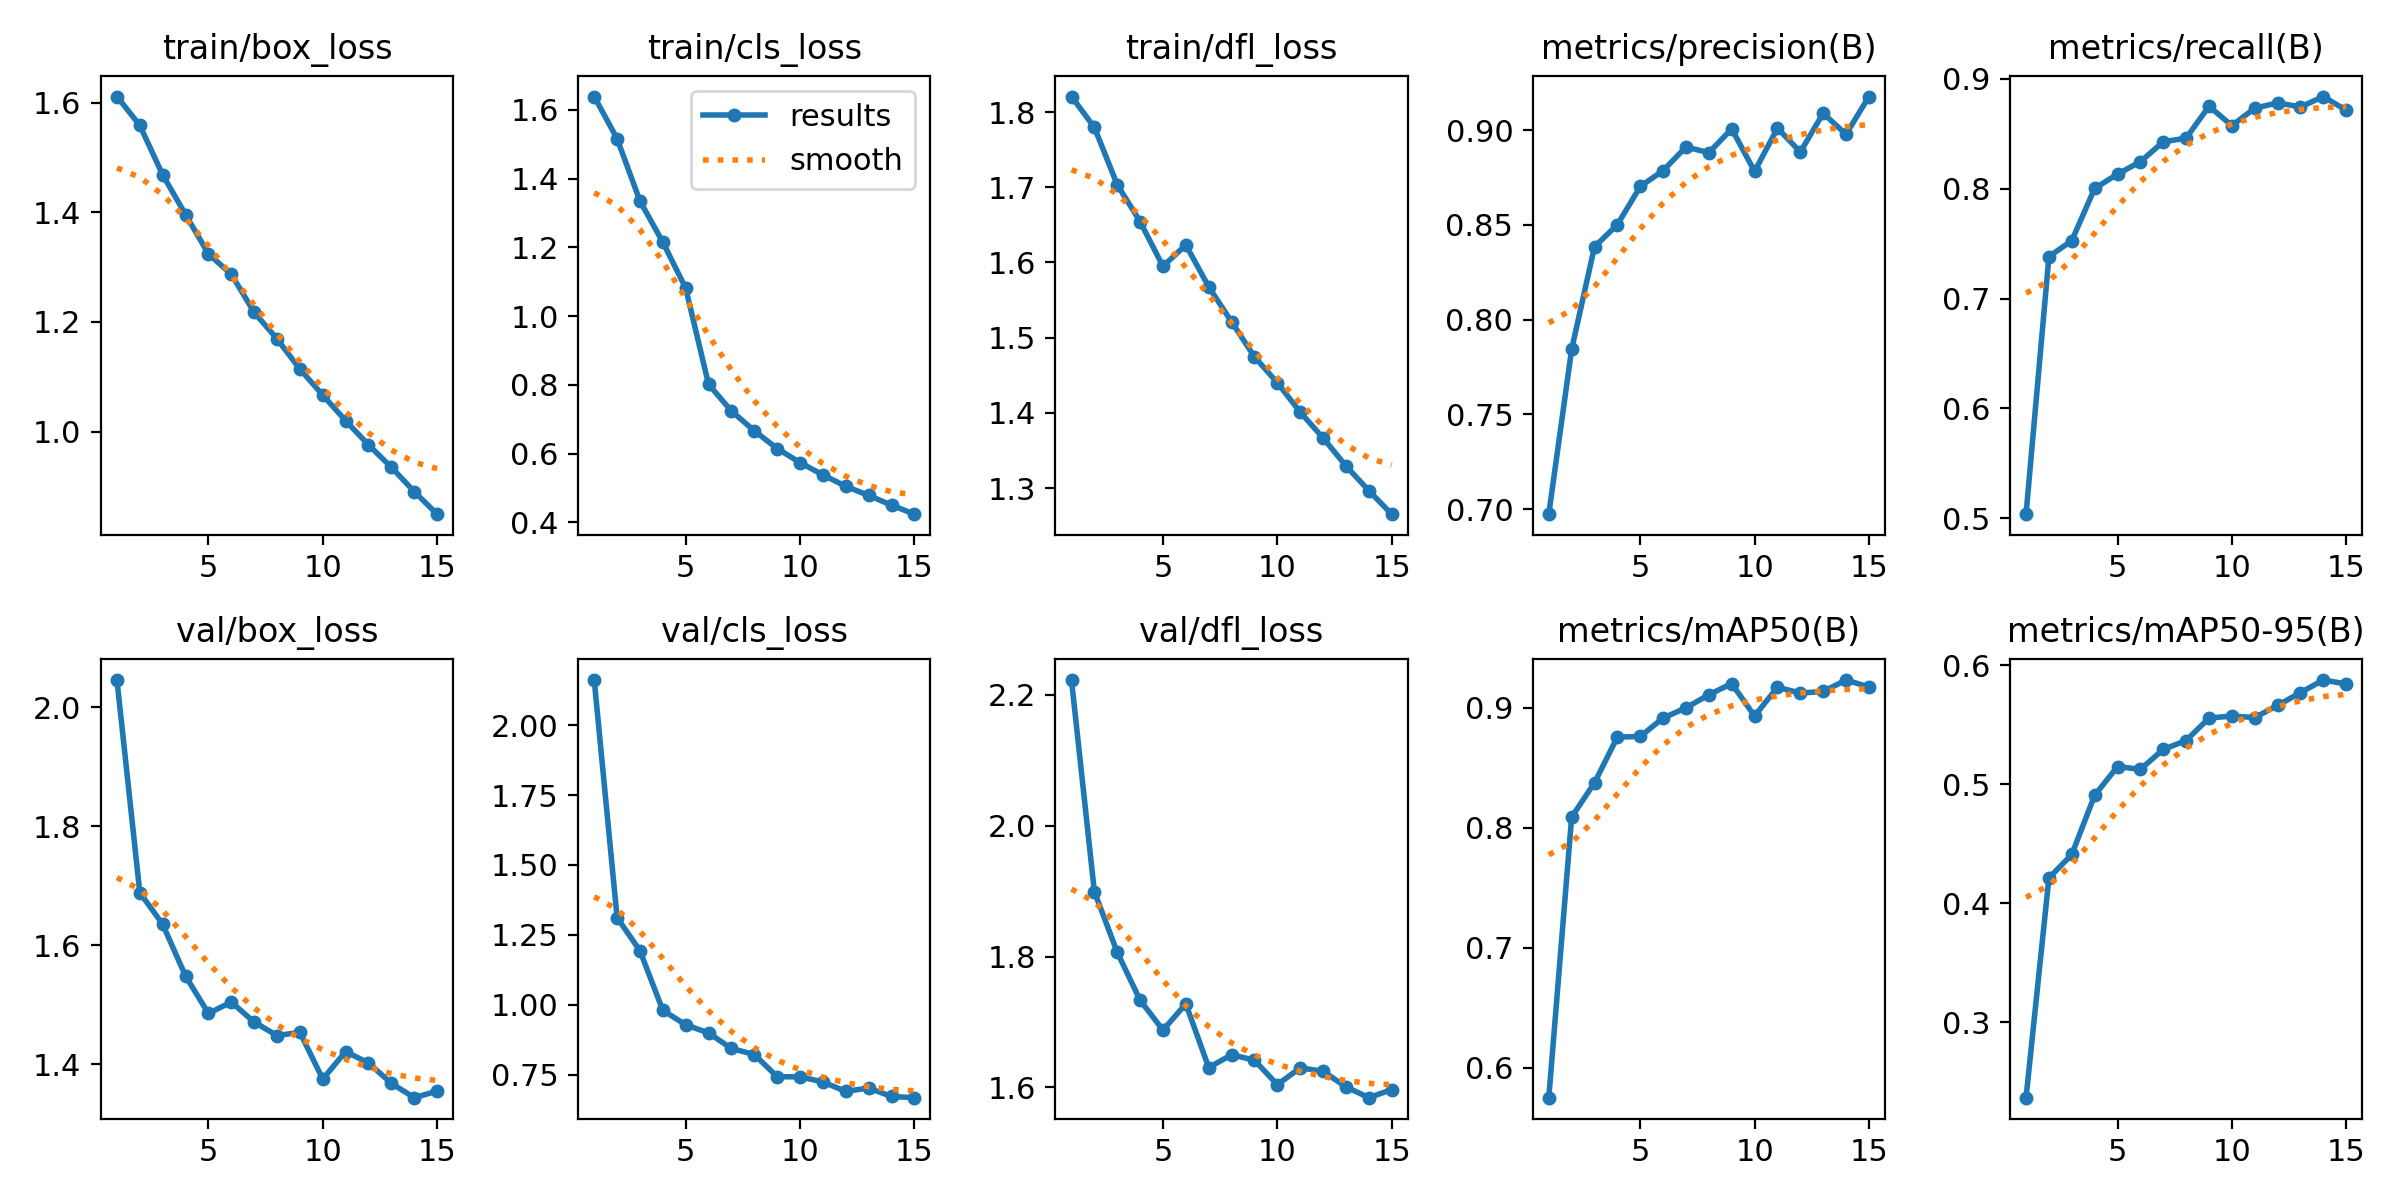

In [ ]:
Image(filename='/content/runs/detect/train2/results.png',width=600)

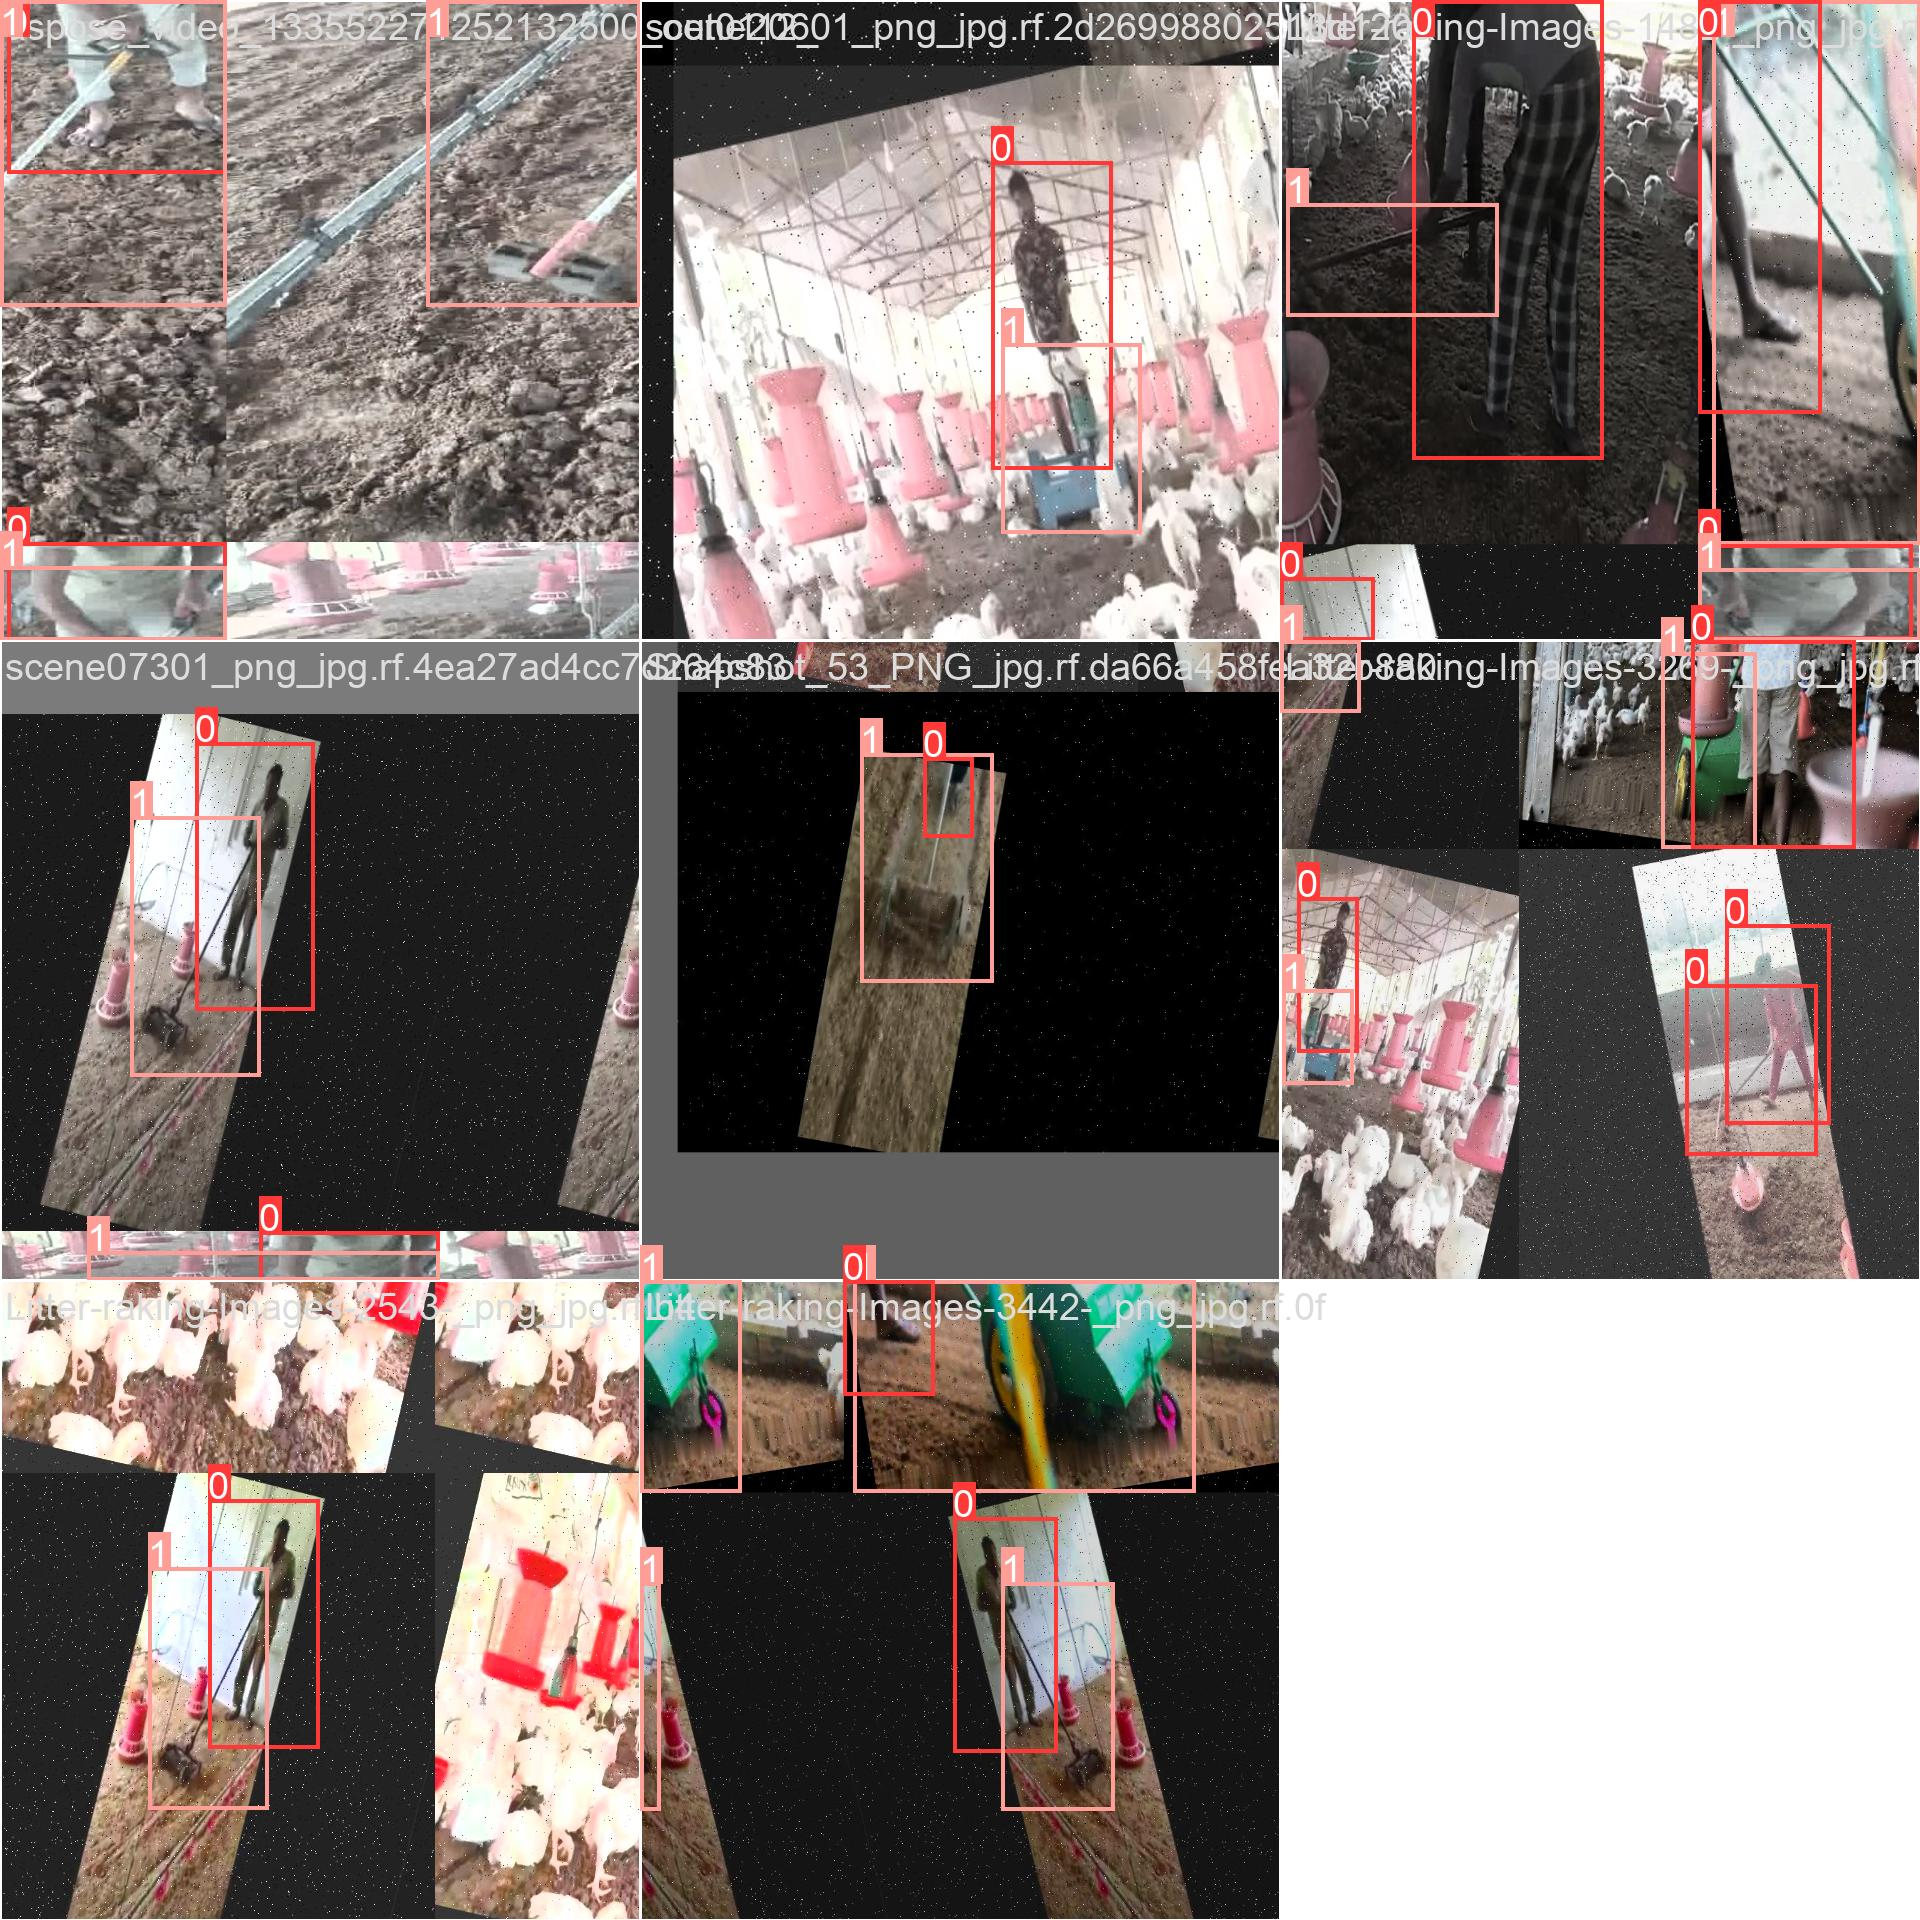

In [14]:
Image(filename='/content/runs/detect/train2/train_batch1.jpg',width=600)

#validate Custome Model


In [15]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/smart-poultry-farm-litter-raking-3/valid/labels.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:33<00:00,  2.18it/s]


                   all       1181       2223      0.888      0.848      0.911      0.554
                 human       1181       1089       0.89      0.903      0.926      0.602
               machine       1181       1134      0.886      0.793      0.897      0.506
Speed: 0.4ms preprocess, 22.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


array([    0.60194,     0.50637])

In [16]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/smart-poultry-farm-litter-raking-3/data.yaml

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/smart-poultry-farm-litter-raking-3/valid/labels.cache... 1181 images, 0 backgrounds, 0 corrupt: 100% 1181/1181 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 74/74 [00:35<00:00,  2.09it/s]
                   all       1181       2223      0.888      0.848      0.911      0.554
                 human       1181       1089       0.89      0.903      0.926      0.602
               machine       1181       1134      0.886      0.793      0.897      0.506
Speed: 0.6ms preprocess, 23.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


#predict


In [17]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a custom model

# Predict with the model
results = model('/content/smart-poultry-farm-litter-raking-3/train/images/0-2-_jpg.rf.02e88fed0d8745205b4b8152cd4dfc3c.jpg')


image 1/1 /content/smart-poultry-farm-litter-raking-3/train/images/0-2-_jpg.rf.02e88fed0d8745205b4b8152cd4dfc3c.jpg: 640x640 2 humans, 1 machine, 37.1ms
Speed: 1.7ms preprocess, 37.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


#inference with Custom Model


In [18]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/smart-poultry-farm-litter-raking-3/test/images save=True

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364327-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_11000_jpeg_jpg.rf.e3eceffa14a1caa23fda46f08a9d9ca7.jpg: 640x640 1 human, 1 machine, 38.3ms
image 2/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364335-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_6000_jpeg_jpg.rf.d2f0e790565f6d06966e1621e271d447.jpg: 640x640 1 human, 1 machine, 37.1ms
image 3/603 /content/smart-poultry-farm-litter-raking-3/test/images/-trashed-1713364337-vf_how-to-do-Litter-raking-in-poultry-farm-_chicken-_farming-_poultrytreatment-_poultrydiseases-480P-_5000_jpeg_jpg.rf.b4062c9a2568ad80390676481b3cc05e.jpg: 640x640 1 human, 1 machin

In [19]:
infer =YOLO("/content/runs/detect/train2/weights/best.pt")

In [20]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (49.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 217.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.5s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 12.2s, saved as '/content/runs/detect/train2/weights/best.onnx' (98.8 MB)

Export complete (15.9s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train2/weights/best.onnx imgsz=640  
Validate:        yo

'/content/runs/detect/train2/weights/best.onnx'

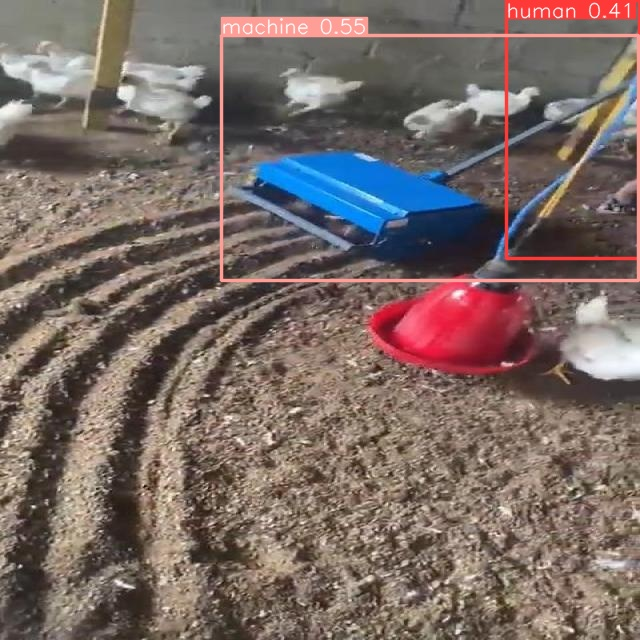

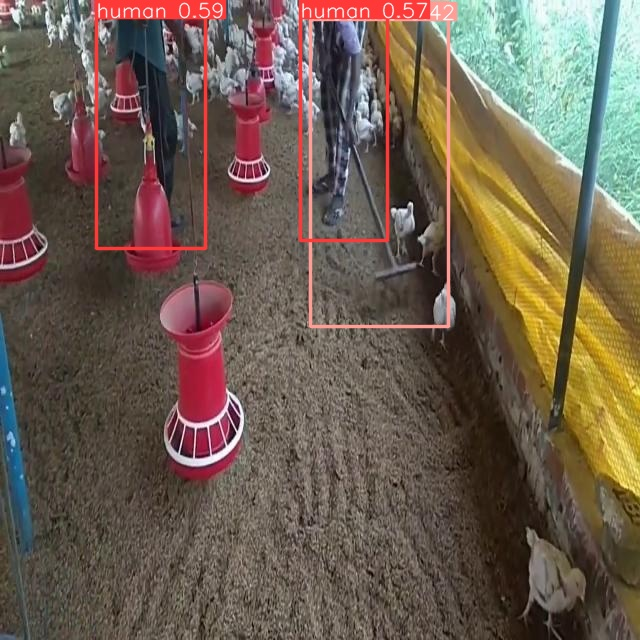

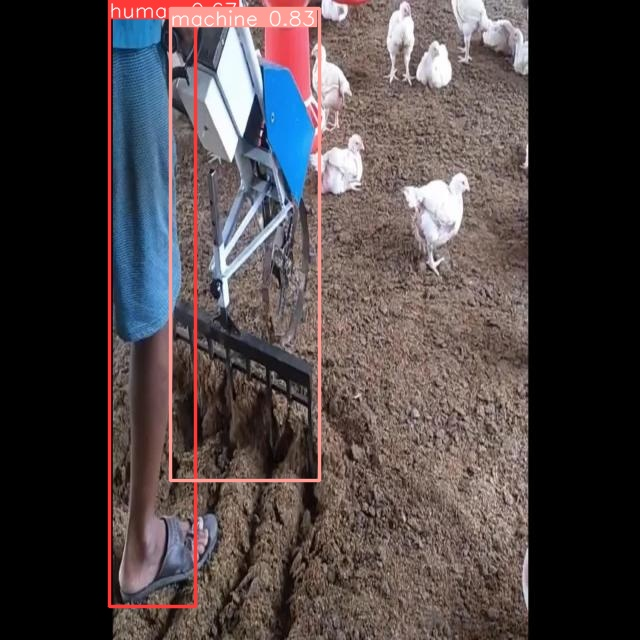

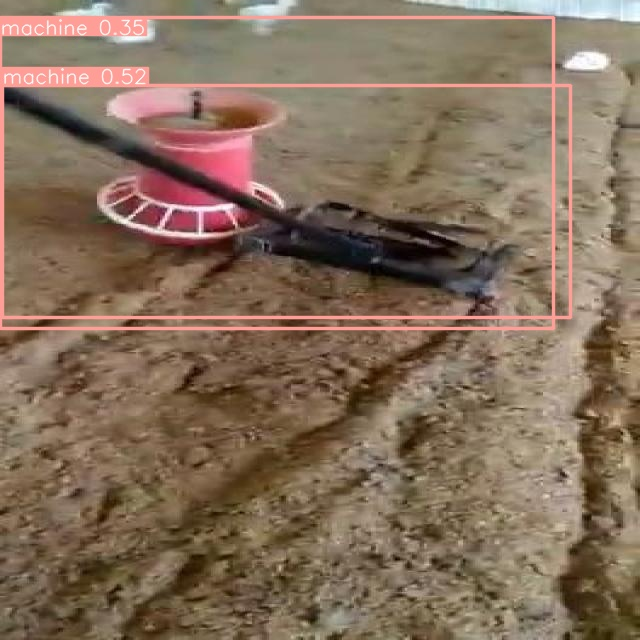

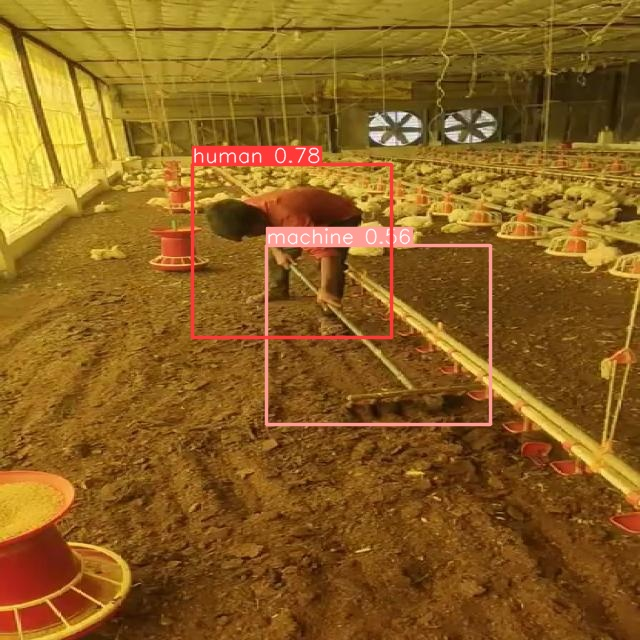

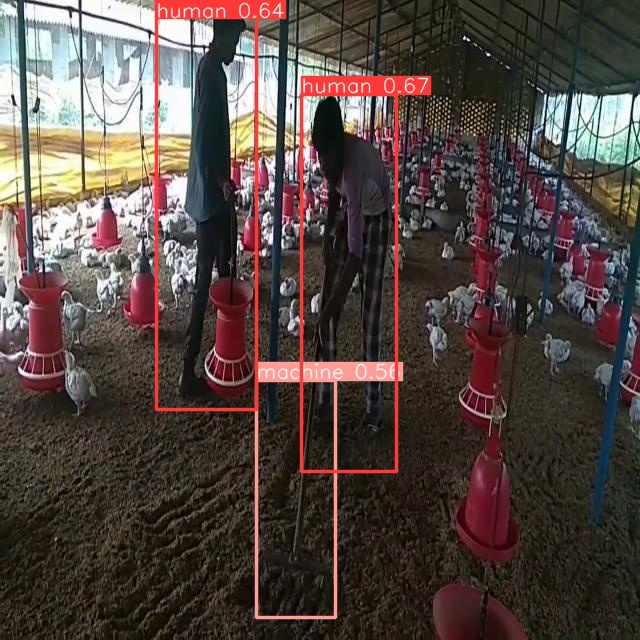

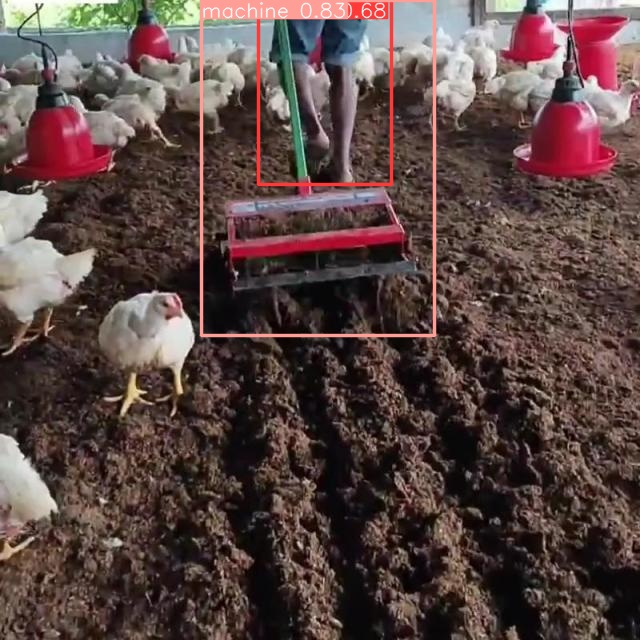

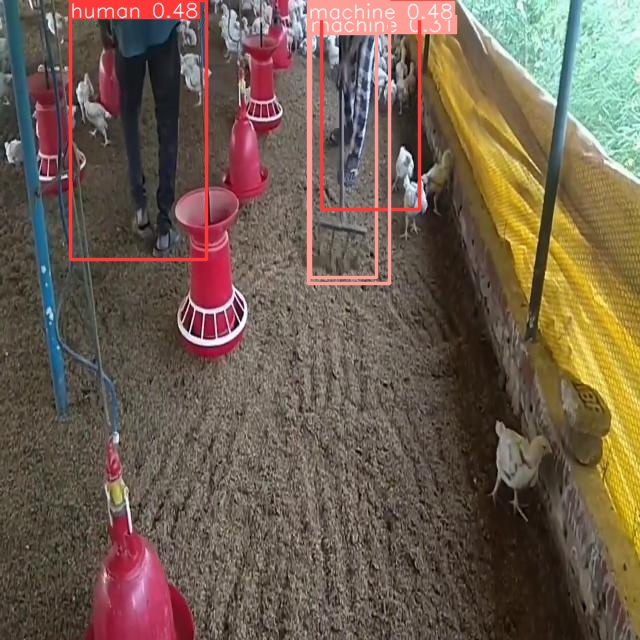

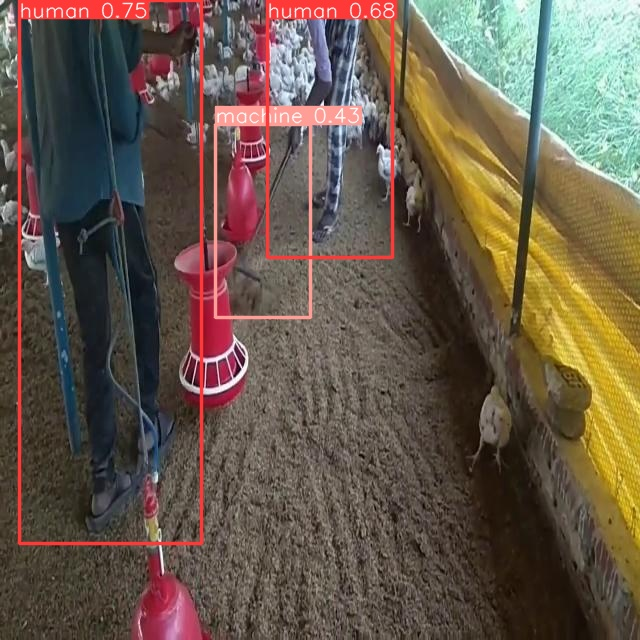

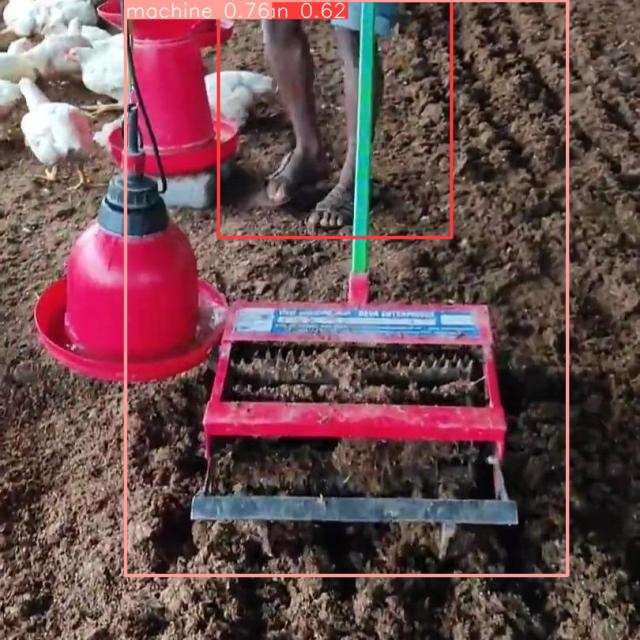

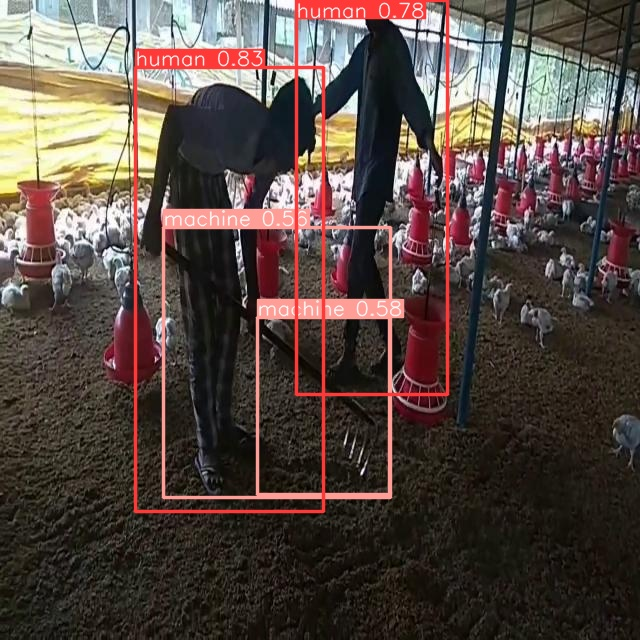

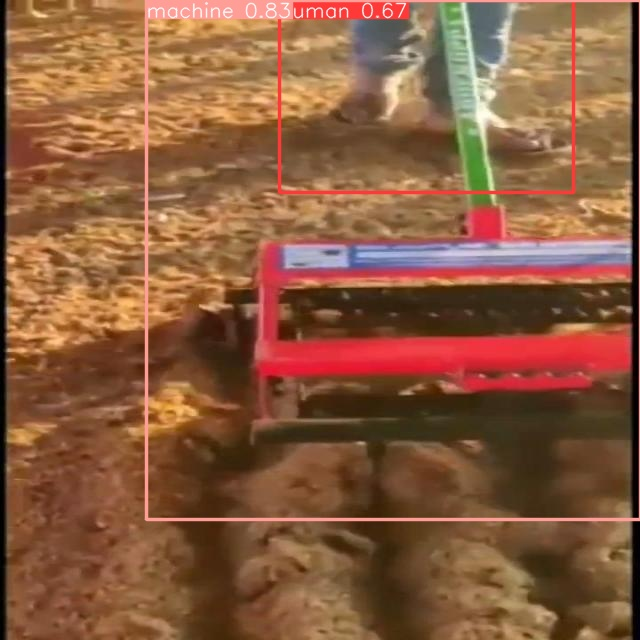

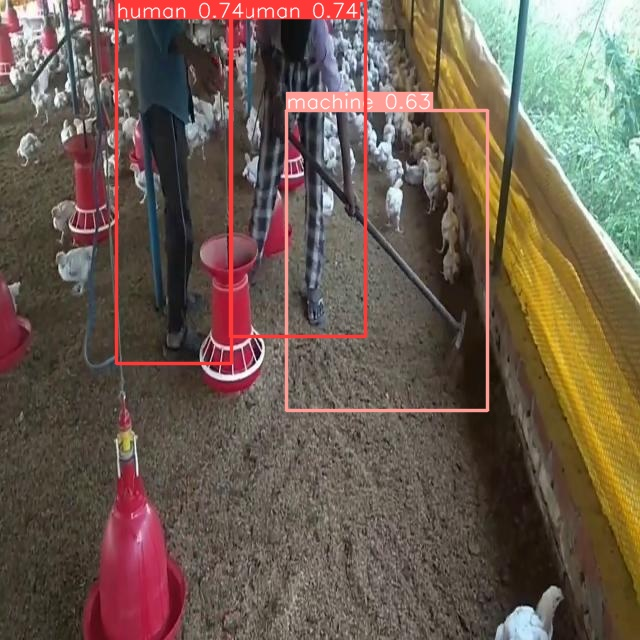

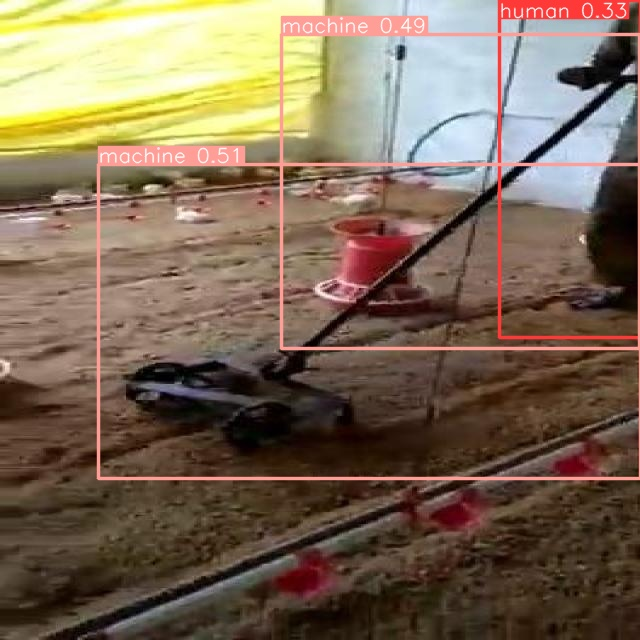

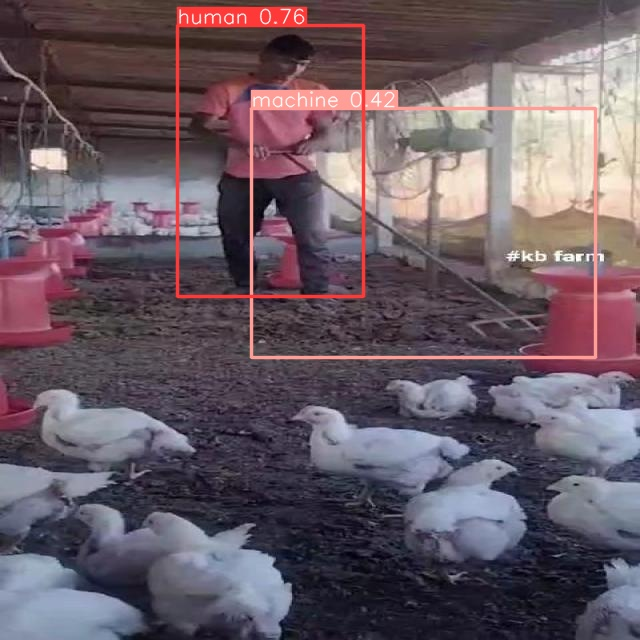

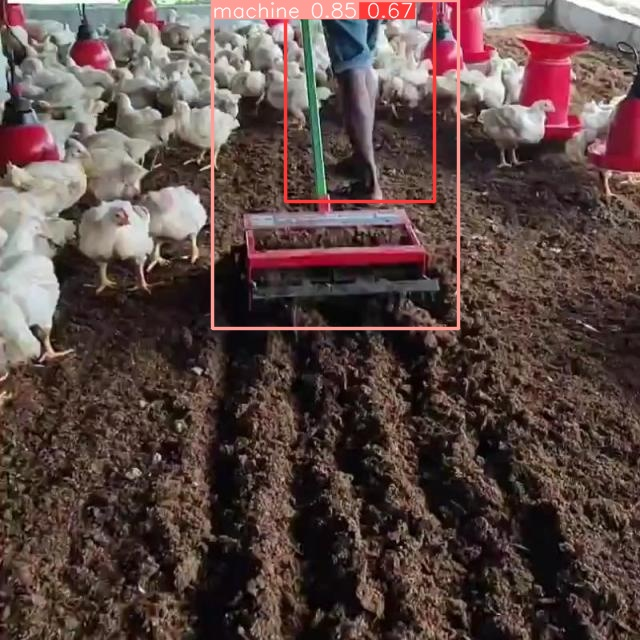

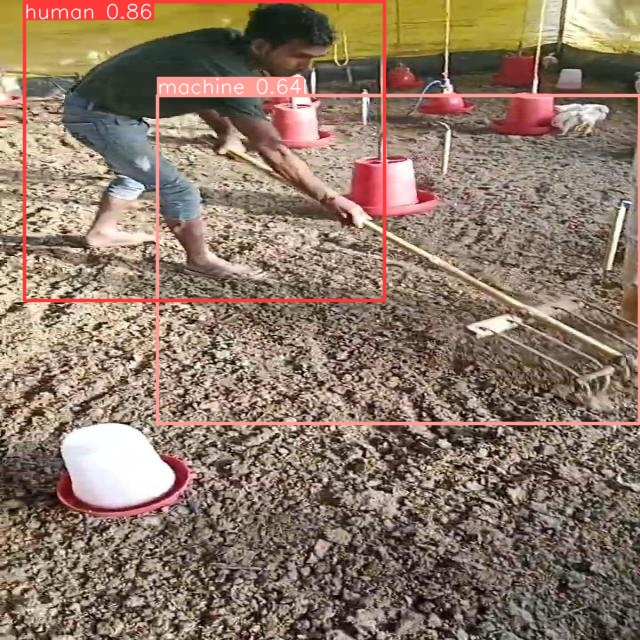

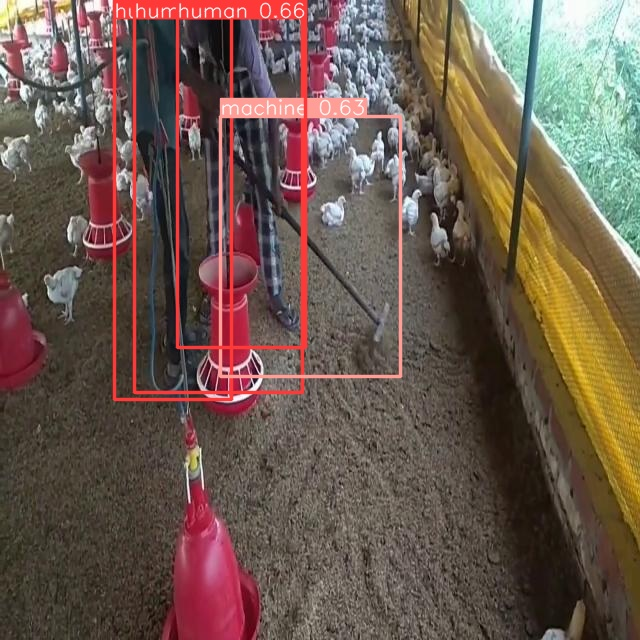

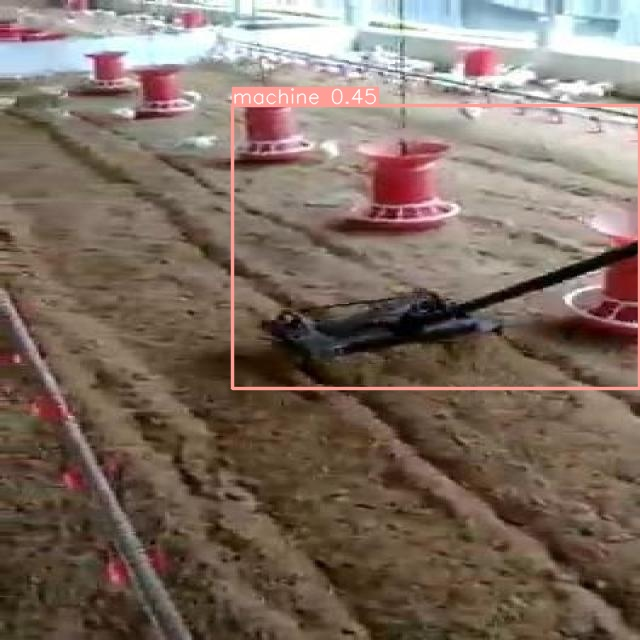

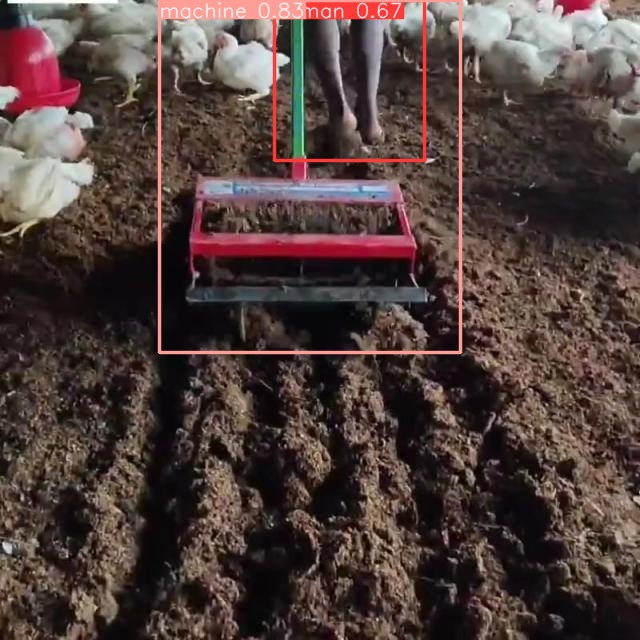

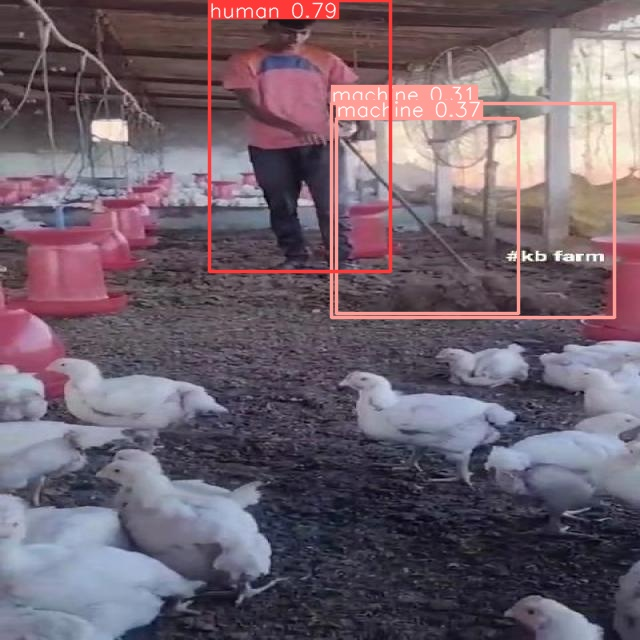

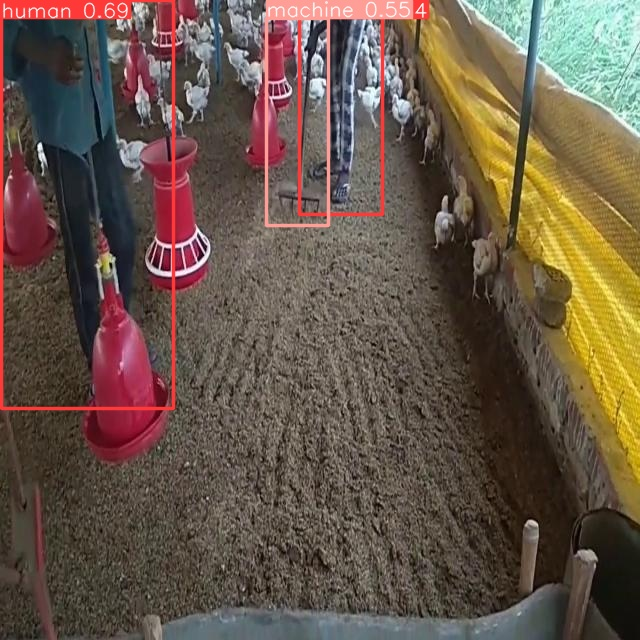

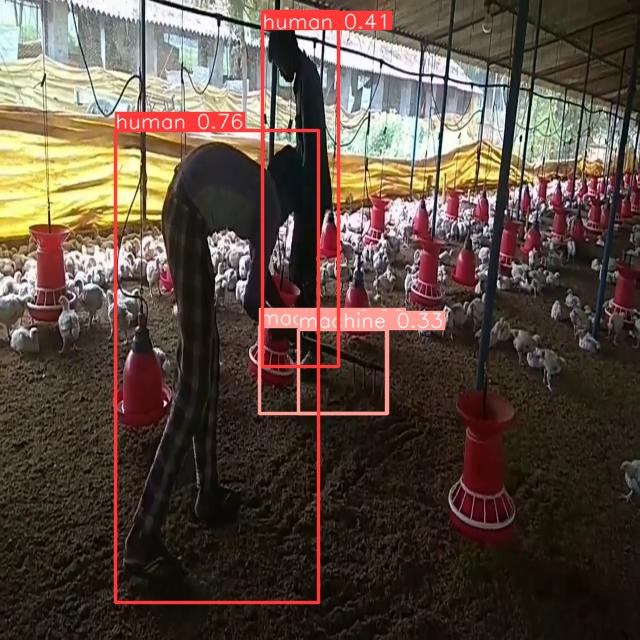

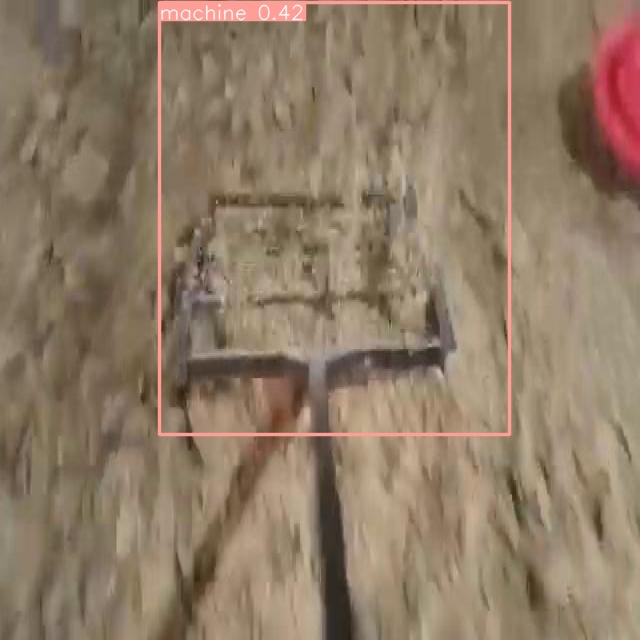

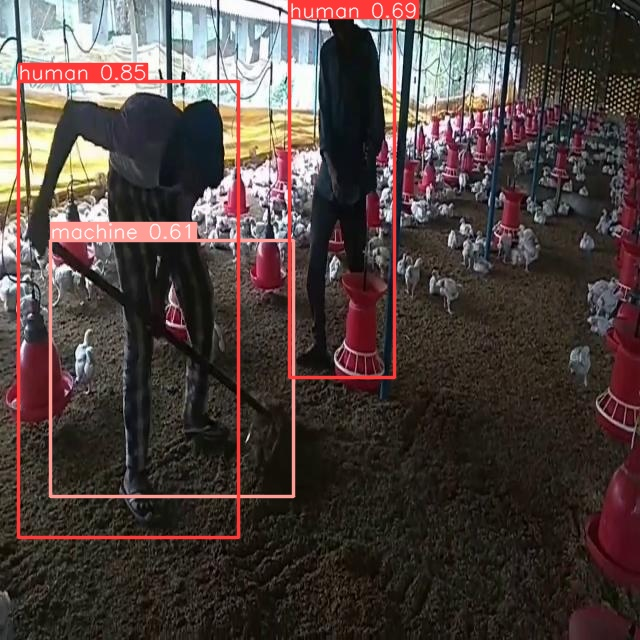

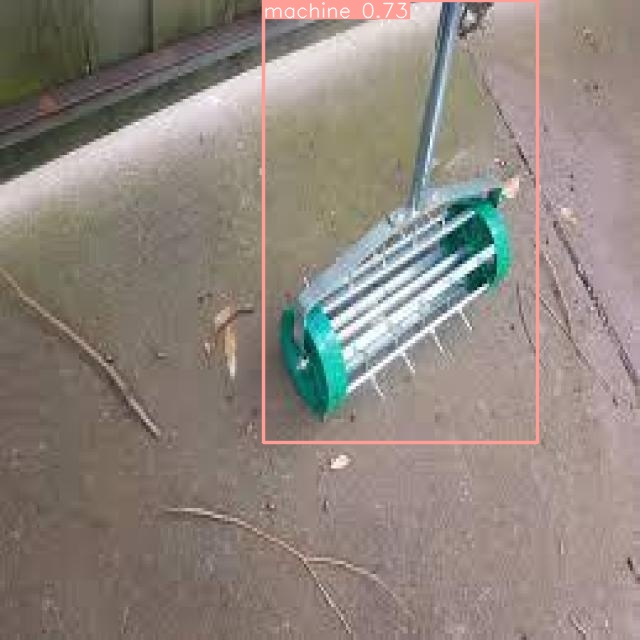

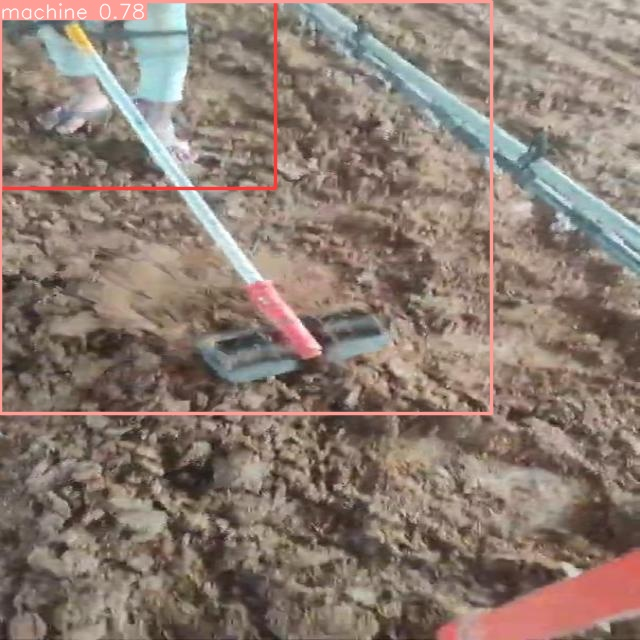

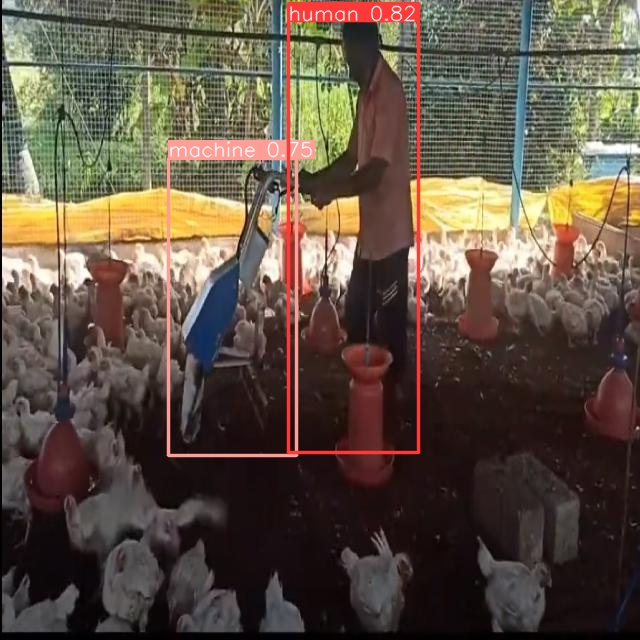

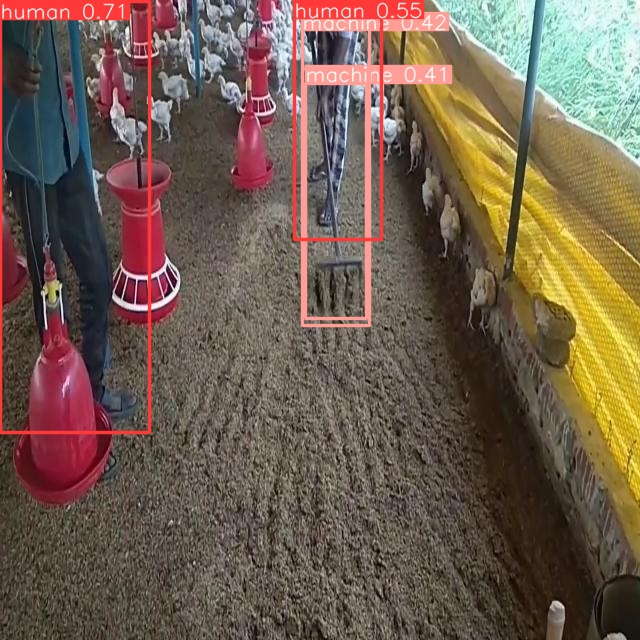

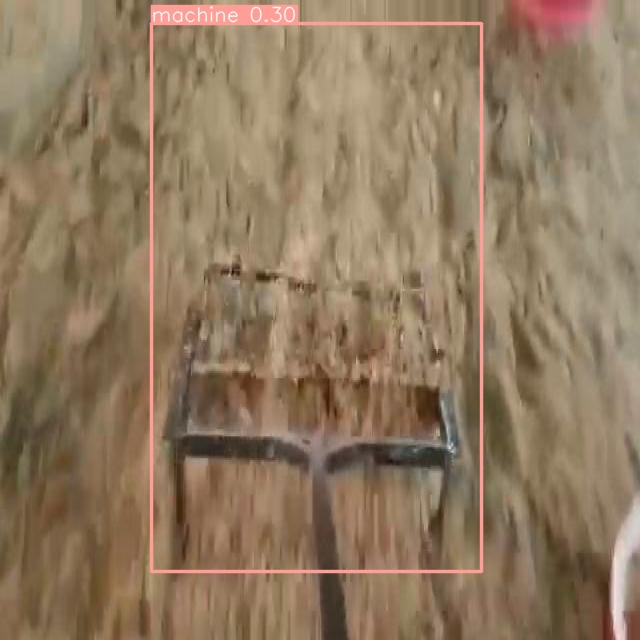

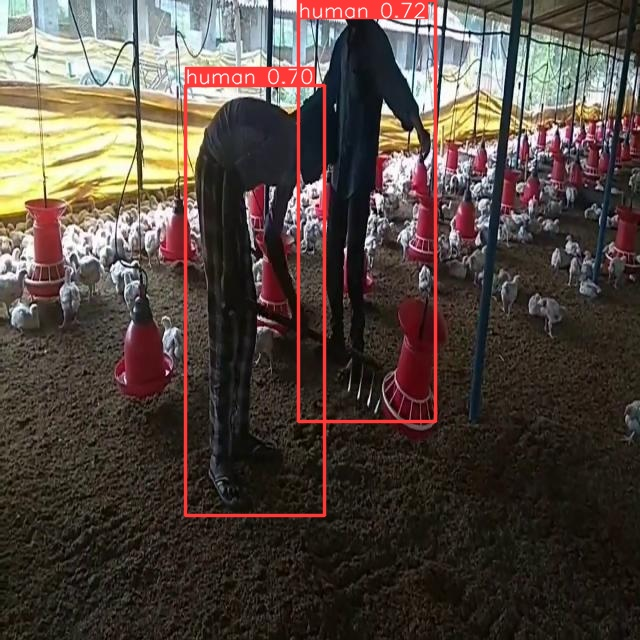

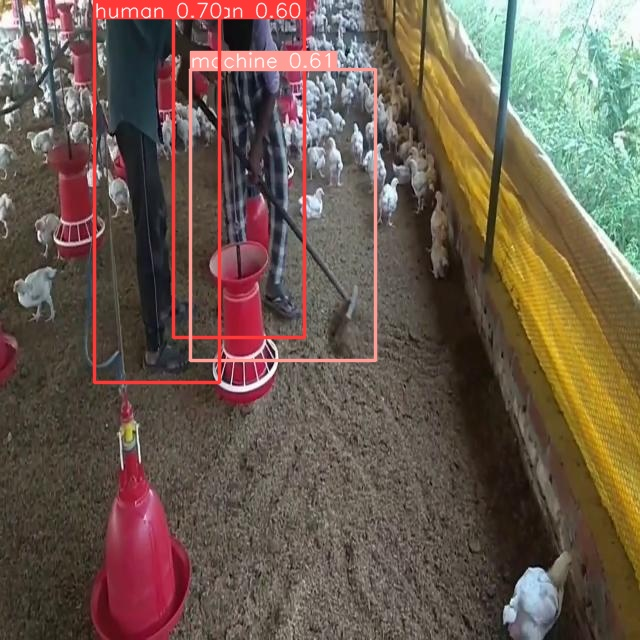

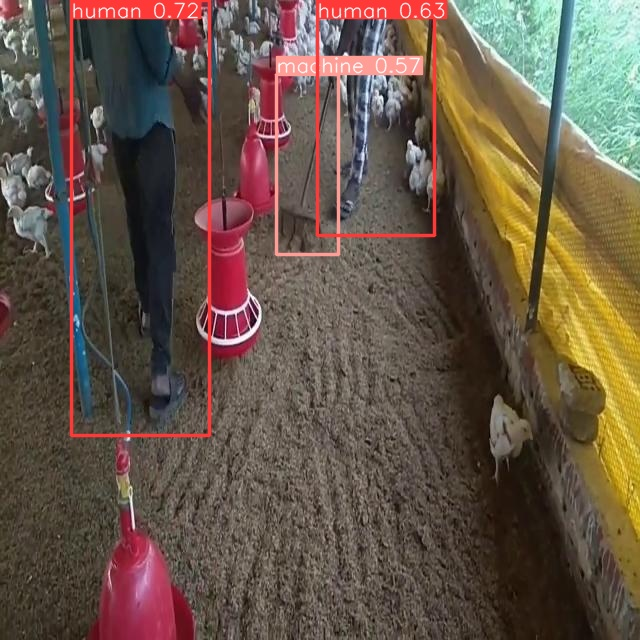

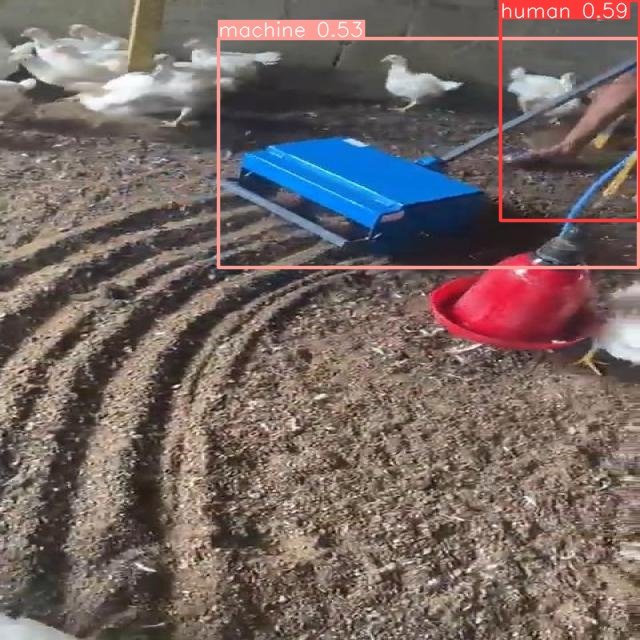

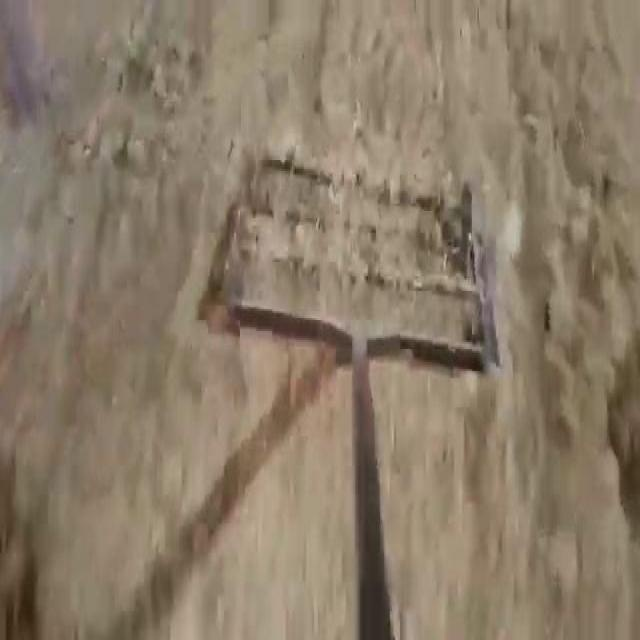

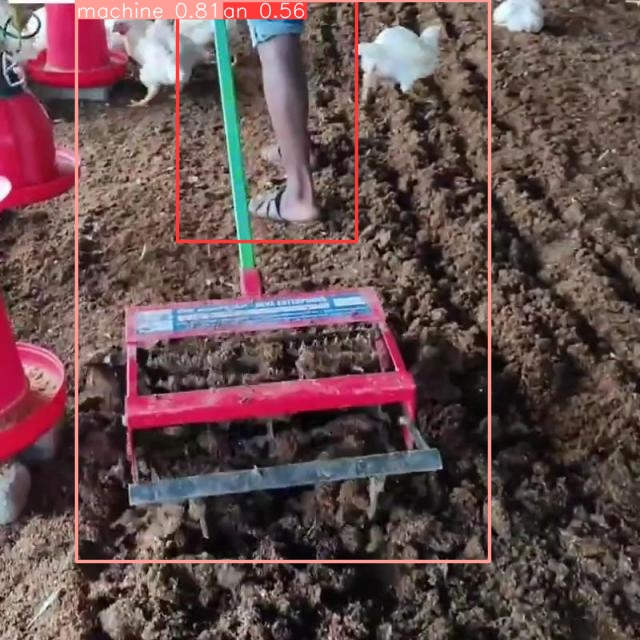

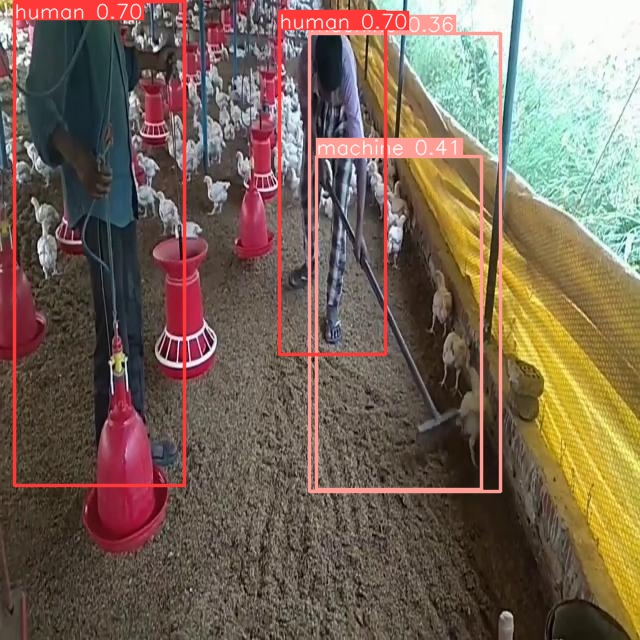

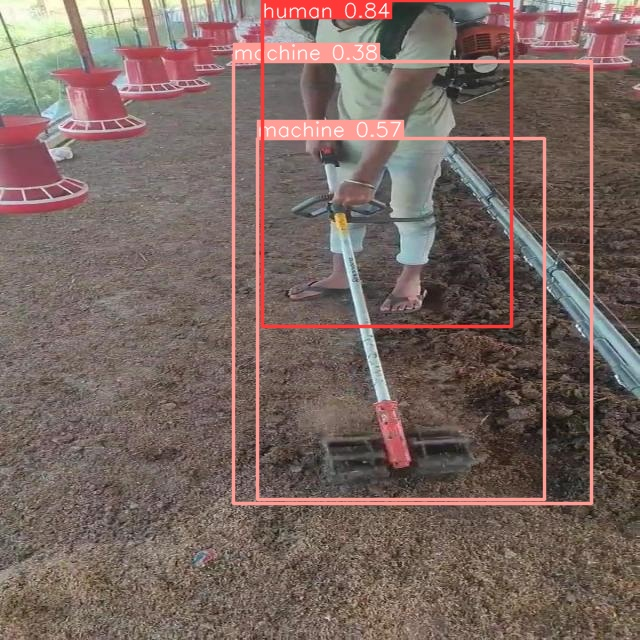

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[12:50]:
      display(Image(filename=image_path, width=600))
      print("\n")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.2/773.2 kB 9.5 MB/s eta 0:00:00
     

2024-04-03 14:15:22.024 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
